In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore")


## observ

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/Users/afnanalamri/Desktop/MyProject/TelcoCustomerChurn/raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape


(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [11]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [12]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [13]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [14]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [15]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [16]:
df.duplicated().sum()


0

In [17]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [18]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [19]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [20]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [21]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [23]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [24]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Data Manipulation 

In [25]:
df= df.drop(columns='customerID')

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Deep analysis reveals indirect missingness, likely from blank spaces. Let’s investigate!**

In [27]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [29]:
df['SeniorCitizen'] = pd.to_numeric(df.SeniorCitizen, errors='coerce')
df['SeniorCitizen'].isnull().sum()

0

In [30]:
df['tenure'] = pd.to_numeric(df.tenure, errors='coerce')
df['tenure'].isnull().sum()

0

In [31]:
df['MonthlyCharges'] = pd.to_numeric(df.MonthlyCharges, errors='coerce')
df['MonthlyCharges'].isnull().sum()

0

In [32]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Notably, the Tenure column shows 0 for these entries, despite values in MonthlyCharges. Let's check for other 0 values in Tenure.

In [34]:
df[df['tenure'] == 0]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [35]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [36]:
df = df[df['tenure'] != 0]


In [37]:
df[df['tenure'] == 0]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


After filtering the data with df[df['tenure'] == 0], all rows with a tenure of 0 were removed, effectively excluding all new customers who hadn't accumulated total charges (TotalCharges) yet.

In [38]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [39]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Encoding 

Applied Label Encoding for binary columns and OneHot Encoding for multi-category columns using a Pipeline and ColumnTransformer. This organized approach simplifies data transformation for modeling.

In [49]:
# Label encode binary columns directly
label_columns = ["gender", "Partner", "Dependents", "PhoneService", "Churn"]
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# OneHot encode for columns with multiple categories
onehot_columns = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

# Build a preprocessor using ColumnTransformer and OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), onehot_columns)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline to apply the preprocessing and then fit a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply transformations and convert to a DataFrame
df_transformed = pipeline.fit_transform(df)
df_encoded = pd.DataFrame(df_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
df_encoded.head()


,onehot__MultipleLines_No,onehot__MultipleLines_No phone service,onehot__MultipleLines_Yes,onehot__InternetService_DSL,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__OnlineSecurity_No,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__DeviceProtection_No,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,onehot__TechSupport_No,onehot__TechSupport_No internet service,onehot__TechSupport_Yes,onehot__StreamingTV_No,onehot__StreamingTV_No internet service,onehot__StreamingTV_Yes,onehot__StreamingMovies_No,onehot__StreamingMovies_No internet service,onehot__StreamingMovies_Yes,onehot__Contract_Month-to-month,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_No,onehot__PaperlessBilling_Yes,onehot__PaymentMethod_Bank transfer (automatic),onehot__PaymentMethod_Credit card (automatic),onehot__PaymentMethod_Electronic check,onehot__PaymentMethod_Mailed check,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__MonthlyCharges,remainder__TotalCharges,remainder__Churn
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,29.85,29.85,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,34.0,1.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,53.85,108.15,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,0.0,42.30,1840.75,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,70.70,151.65,1.0


In [64]:
df_encoded.columns = df_encoded.columns.str.replace('onehot__', '', regex=True)
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '', regex=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_', regex=True)
df_encoded.columns = df_encoded.columns.str.replace('-', '_', regex=True)
df_encoded.columns = df_encoded.columns.str.replace('ـ', '_', regex=True)

df_encoded.columns

Index(['MultipleLines_No', 'MultipleLines_No_phone_service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet_service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No_internet_service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet_service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer_(automatic)',
       'PaymentMethod_Credit_card_(automatic)',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
  

In [65]:
s= pd.DataFrame(df_encoded.dtypes)
s

,0
MultipleLines_No,float64
MultipleLines_No_phone_service,float64
MultipleLines_Yes,float64
InternetService_DSL,float64
InternetService_Fiber_optic,float64
InternetService_No,float64
OnlineSecurity_No,float64
OnlineSecurity_No_internet_service,float64
OnlineSecurity_Yes,float64
OnlineBackup_No,float64


## Visualization 

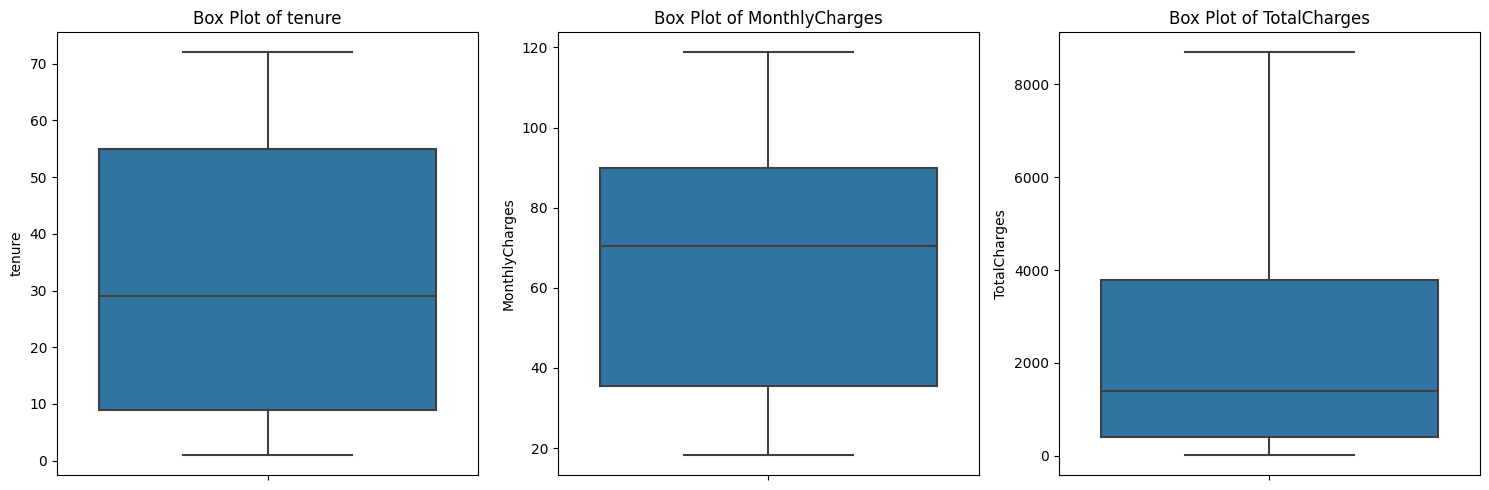

In [126]:
# List of numerical columns to check for outliers
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create box plots for each numerical column
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=column, data=df_encoded)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


- 26.6% of customers Churn to another company.
- Customers are 49.5% female and 50.5% male.

In [127]:
gender_counts = df_encoded['gender'].value_counts()
churn_counts = df_encoded['Churn'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Male', 'Female'], values=gender_counts, hole=.4), 1, 1)
fig.add_trace(go.Pie(labels=['No', 'Yes'], values=churn_counts, hole=.4), 1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(title_text="Gender and Churn Distributions",
                   annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)])

fig.show()


I examined the relationship between Gender and Churn using pie charts for each category. The results showed that churn rates are similar for both males and females, indicating that there is no strong relationship between gender and churn.

In [128]:
gender_churn_distribution = pd.crosstab(df_encoded['gender'], df_encoded['Churn'], normalize='index')
gender_churn_distribution

Churn,0.0,1.0
gender,,
0.0,0.730405,0.269595
1.0,0.737954,0.262046


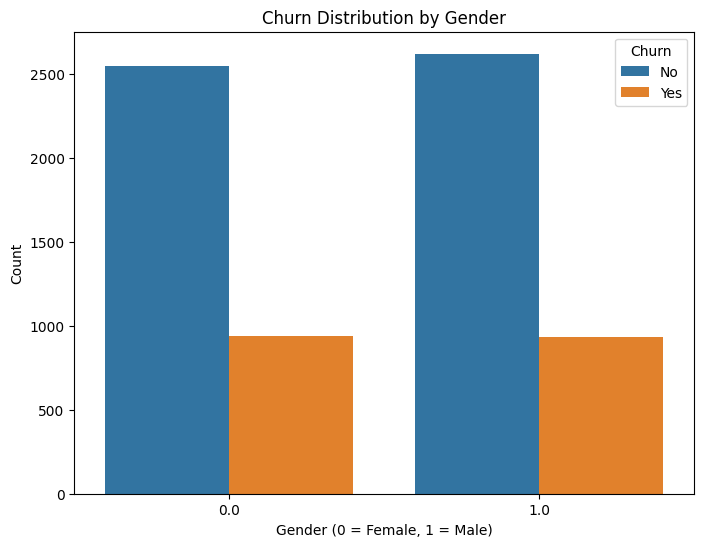

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_encoded, x='gender', hue='Churn')
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [130]:
gender_churn_counts = pd.crosstab(df_encoded['gender'], df_encoded['Churn'])

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

male_counts = gender_churn_counts.loc[0]
female_counts = gender_churn_counts.loc[1]

fig.add_trace(go.Pie(labels=['No Churn', 'Churn'], values=male_counts, hole=.4, name="Male"), 1, 1)

fig.add_trace(go.Pie(labels=['No Churn', 'Churn'], values=female_counts, hole=.4, name="Female"), 1, 2)

fig.update_layout(
    title_text="Churn Distribution by Gender",
    annotations=[dict(text='Male', x=0.21, y=0.5, font_size=16, showarrow=False),
                 dict(text='Female', x=0.80, y=0.5, font_size=16, showarrow=False)]
)

fig.show()


In [131]:
df_encoded["Churn"][df_encoded["Churn"]==0].groupby(by=df_encoded["gender"]).count()


gender
0.0    2544
1.0    2619
Name: Churn, dtype: int64

In [132]:
df_encoded["Churn"][df_encoded["Churn"]==1].groupby(by=df_encoded["gender"]).count()


gender
0.0    939
1.0    930
Name: Churn, dtype: int64

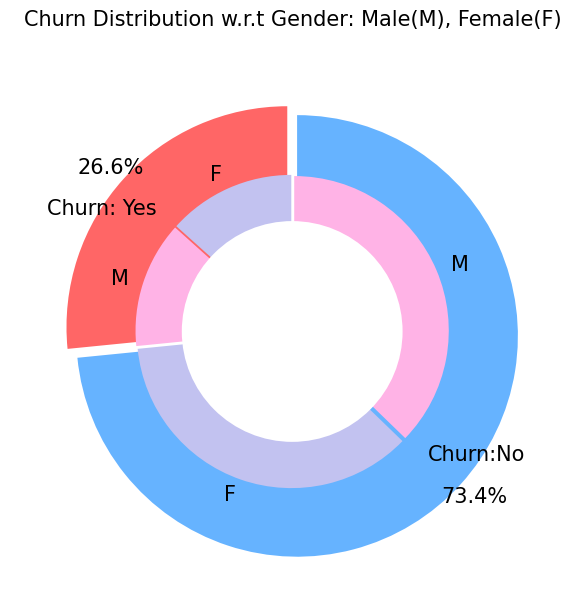

In [133]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

Approximately 75% of customers with a Month-to-Month contract chose to churn, compared to 13% of those with a One-Year contract and only 3% with a Two-Year contract.

In [ ]:
contracts = {
    "Month-to-Month": "Contract_Month_to_month",
    "One Year": "Contract_One_year",
    "Two Year": "Contract_Two_year"
}

fig = go.Figure()

for contract_name, column_name in contracts.items():
    churn_counts = df_encoded[df_encoded[column_name] == 1].groupby("Churn").size()
    fig.add_trace(go.Bar(
        x=["No Churn", "Churn"],
        y=[churn_counts.get(0, 0), churn_counts.get(1, 0)],
        name=contract_name
    ))

fig.update_layout(
    title_text="<b>Customer Contract Distribution by Churn</b>",
    barmode='group',
    width=700,
    height=500,
    bargap=0.1
)

fig.show()


Distribution of payment methods among customers shows that Electronic Check is the most common payment method.

In [142]:
payment_methods = {
    "Electronic Check": df_encoded["PaymentMethod_Electronic_check"].sum(),
    "Mailed Check": df_encoded["PaymentMethod_Mailed_check"].sum(),
    "Bank Transfer (Automatic)": df_encoded["PaymentMethod_Bank_transfer_(automatic)"].sum(),
    "Credit Card (Automatic)": df_encoded["PaymentMethod_Credit_card_(automatic)"].sum()
}

labels = list(payment_methods.keys())
values = list(payment_methods.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

The majority of customers who churned were using Electronic Check as their payment method. In contrast, customers who chose Credit Card automatic transfer, Bank automatic transfer, or Mailed Check were less likely to churn.

In [ ]:
payment_methods = {
    "Electronic Check": df_encoded[df_encoded["PaymentMethod_Electronic_check"] == 1].groupby("Churn").size(),
    "Mailed Check": df_encoded[df_encoded["PaymentMethod_Mailed_check"] == 1].groupby("Churn").size(),
    "Bank Transfer (Automatic)": df_encoded[df_encoded["PaymentMethod_Bank_transfer_(automatic)"] == 1].groupby("Churn").size(),
    "Credit Card (Automatic)": df_encoded[df_encoded["PaymentMethod_Credit_card_(automatic)"] == 1].groupby("Churn").size()
}

fig = go.Figure()

for method, counts in payment_methods.items():
    fig.add_trace(go.Bar(
        x=["No Churn", "Churn"],
        y=[counts.get(0, 0), counts.get(1, 0)],
        name=method
    ))

fig.update_layout(
    title_text="<b>Customer Payment Method distribution w.r.t. Churn</b>",
    barmode='stack',
    width=700,
    height=500,
    bargap=0.1
)

fig.show()


A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [159]:
internet_services = {
    "DSL": "InternetService_DSL",
    "Fiber optic": "InternetService_Fiber_optic",
    "No Internet": "InternetService_No"
}

fig = go.Figure()

for service_name, column_name in internet_services.items():
    churn_counts = df_encoded.groupby(["Churn", "gender"])[column_name].sum().unstack().fillna(0)

    fig.add_trace(go.Bar(
        x=["Churn:No - Female", "Churn:No - Male", "Churn:Yes - Female", "Churn:Yes - Male"],
        y=[churn_counts.loc[0, 0], churn_counts.loc[0, 1],
           churn_counts.loc[1, 0], churn_counts.loc[1, 1]],
        name=service_name
    ))

fig.update_layout(
    title_text="<b>Churn Distribution by Internet Service and Gender</b>",
    barmode='group',
    xaxis_title="Churn and Gender",
    yaxis_title="Count",
    width=800,
    height=600
)

fig.show()


Customers who do not have dependents show a higher tendency to churn.

In [162]:
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers without partners show a higher likelihood of churning.

In [164]:
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn Distribution Based on Partner Status</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()